In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('mnist_train.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) 

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape


In [3]:
X_train.shape

(784, 59000)

In [4]:
Y_train.shape


(59000,)

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    return Z > 0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [7]:
W1, b1, W2, b2 = init_params()

In [8]:
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)

one_hot(Y_train).shape

(10, 59000)

In [9]:
Y_train.shape

(59000,)

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[9 9 9 ... 1 9 9] [3 2 8 ... 7 0 5]
0.10038983050847458
Iteration:  10
[3 7 1 ... 1 7 8] [3 2 8 ... 7 0 5]
0.22283050847457628
Iteration:  20
[3 1 1 ... 1 0 8] [3 2 8 ... 7 0 5]
0.32537288135593223
Iteration:  30
[3 1 1 ... 1 0 8] [3 2 8 ... 7 0 5]
0.4083728813559322
Iteration:  40
[3 8 8 ... 1 0 8] [3 2 8 ... 7 0 5]
0.4737457627118644
Iteration:  50
[3 3 3 ... 7 0 8] [3 2 8 ... 7 0 5]
0.521593220338983
Iteration:  60
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.5583728813559322
Iteration:  70
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.5873050847457627
Iteration:  80
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.6128135593220339
Iteration:  90
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.6333050847457627
Iteration:  100
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.6516101694915254
Iteration:  110
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.6679322033898305
Iteration:  120
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.682135593220339
Iteration:  130
[3 3 8 ... 7 0 8] [3 2 8 ... 7 0 5]
0.6955932203389831
Iteration:  140


~85% accuracy on training set.

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [3]
Label:  3


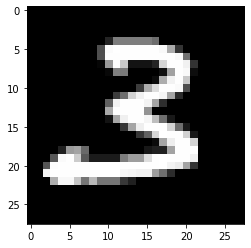

Prediction:  [2]
Label:  2


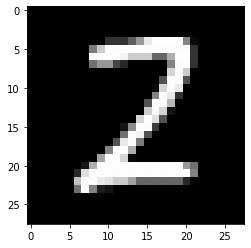

Prediction:  [8]
Label:  8


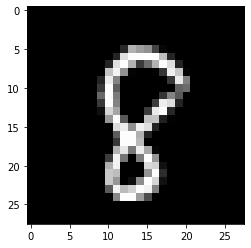

Prediction:  [0]
Label:  5


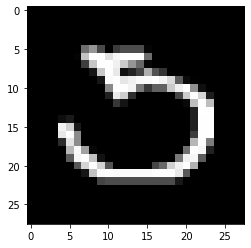

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


Finally, let's find the accuracy on the dev set:

In [13]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[9 8 1 2 7 6 9 6 6 9 1 7 5 4 8 3 6 1 5 3 3 4 0 8 3 2 3 6 2 1 1 9 2 3 8 6 6
 4 5 1 2 4 3 7 9 6 8 2 1 6 3 5 2 9 9 9 6 6 5 7 0 3 8 3 4 1 9 1 3 4 6 3 9 7
 1 2 9 1 0 7 2 6 0 3 6 8 4 3 6 1 3 4 7 8 7 7 2 4 1 4 8 3 2 6 4 1 8 3 4 9 9
 0 6 9 9 3 8 6 2 9 5 9 4 8 4 3 1 6 0 3 1 8 6 2 2 5 2 8 9 4 3 5 6 8 6 8 0 1
 5 8 7 6 9 6 0 9 4 2 9 0 1 2 5 1 3 7 7 9 2 9 7 4 0 9 6 9 8 6 4 4 2 9 1 8 4
 1 4 1 7 5 8 7 4 8 8 2 9 0 8 4 6 6 0 3 8 9 3 1 2 2 9 1 9 9 9 8 7 7 5 3 9 6
 0 5 8 4 0 8 0 5 7 6 3 8 2 4 9 6 4 4 8 6 2 1 6 1 2 4 4 7 4 9 1 7 0 7 8 7 6
 7 0 2 8 3 3 3 7 4 1 5 6 1 8 9 9 2 7 6 4 6 6 7 1 2 2 1 6 1 1 9 4 4 0 5 0 2
 1 6 3 3 0 8 8 8 7 9 5 7 4 1 0 2 2 7 2 3 3 1 1 0 9 6 6 3 8 1 4 6 2 7 6 2 4
 7 8 0 8 1 4 6 3 7 5 9 3 1 4 0 7 9 6 1 4 1 1 3 7 2 9 4 0 2 3 0 7 8 9 2 1 8
 9 0 2 1 0 7 3 7 4 8 7 5 1 5 9 7 5 9 3 1 4 1 5 3 6 3 0 8 8 0 9 3 7 2 1 1 6
 1 7 2 9 0 6 4 8 0 9 5 8 6 4 2 1 9 8 9 1 8 4 5 8 8 2 7 0 5 6 5 2 7 0 1 3 5
 4 9 2 3 6 6 9 0 1 9 8 0 4 0 2 1 1 5 2 8 0 3 0 0 3 2 4 4 4 7 1 9 7 4 0 9 6
 2 6 2 8 8 8 0 7 4 4 6 4 

0.853

Still 85% accuracy, so our model generalized from the training data pretty well.
We are not encountering high varience for this model!!!!!